In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import openpyxl
import xlsxwriter
from pathlib import Path
from pandas import DataFrame
import re
import os
from datetime import timedelta
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_excel("/Users/zhengxin/Downloads/NumDay_quarter.xlsx",engine='openpyxl')
df

,Date,Country,NumDay,LP,GDP
0,1996-06-30,DE,13,87.9,77.663
1,1996-09-30,DE,8,88.3,77.934
2,1997-06-30,DE,0,89.7,79.098
3,1997-09-30,DE,19,89.9,79.368
4,1998-06-30,DE,8,90.3,80.354
...,...,...,...,...,...
139,2017-09-30,NL,16,101.3,105.622
140,2018-06-30,NL,22,101.1,107.590
141,2018-09-30,NL,41,100.7,107.830
142,2019-06-30,NL,14,100.7,109.203


In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.strftime('%d.%m.%Y')
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Quarter'] = pd.DatetimeIndex(df['Date']).quarter
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     144 non-null    object 
 1   Country  144 non-null    object 
 2   NumDay   144 non-null    int64  
 3   LP       144 non-null    float64
 4   GDP      144 non-null    float64
 5   Year     144 non-null    int64  
 6   Quarter  144 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 8.0+ KB
None


,Date,Country,NumDay,LP,GDP,Year,Quarter
0,30.06.1996,DE,13,87.9,77.663,1996,2
1,30.09.1996,DE,8,88.3,77.934,1996,3
2,30.06.1997,DE,0,89.7,79.098,1997,2
3,30.09.1997,DE,19,89.9,79.368,1997,3
4,30.06.1998,DE,8,90.3,80.354,1998,2
...,...,...,...,...,...,...,...
139,30.09.2017,NL,16,101.3,105.622,2017,3
140,30.06.2018,NL,22,101.1,107.590,2018,2
141,30.09.2018,NL,41,100.7,107.830,2018,3
142,30.06.2019,NL,14,100.7,109.203,2019,2


In [4]:
# dummy encoding
df['Country_'] = df['Country']
df = pd.get_dummies(df, columns=['Country_'], drop_first=False, prefix='Country')
df

,Date,Country,NumDay,LP,GDP,Year,Quarter,Country_DE,Country_ES,Country_NL
0,30.06.1996,DE,13,87.9,77.663,1996,2,1,0,0
1,30.09.1996,DE,8,88.3,77.934,1996,3,1,0,0
2,30.06.1997,DE,0,89.7,79.098,1997,2,1,0,0
3,30.09.1997,DE,19,89.9,79.368,1997,3,1,0,0
4,30.06.1998,DE,8,90.3,80.354,1998,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...
139,30.09.2017,NL,16,101.3,105.622,2017,3,0,0,1
140,30.06.2018,NL,22,101.1,107.590,2018,2,0,0,1
141,30.09.2018,NL,41,100.7,107.830,2018,3,0,0,1
142,30.06.2019,NL,14,100.7,109.203,2019,2,0,0,1


## Time series

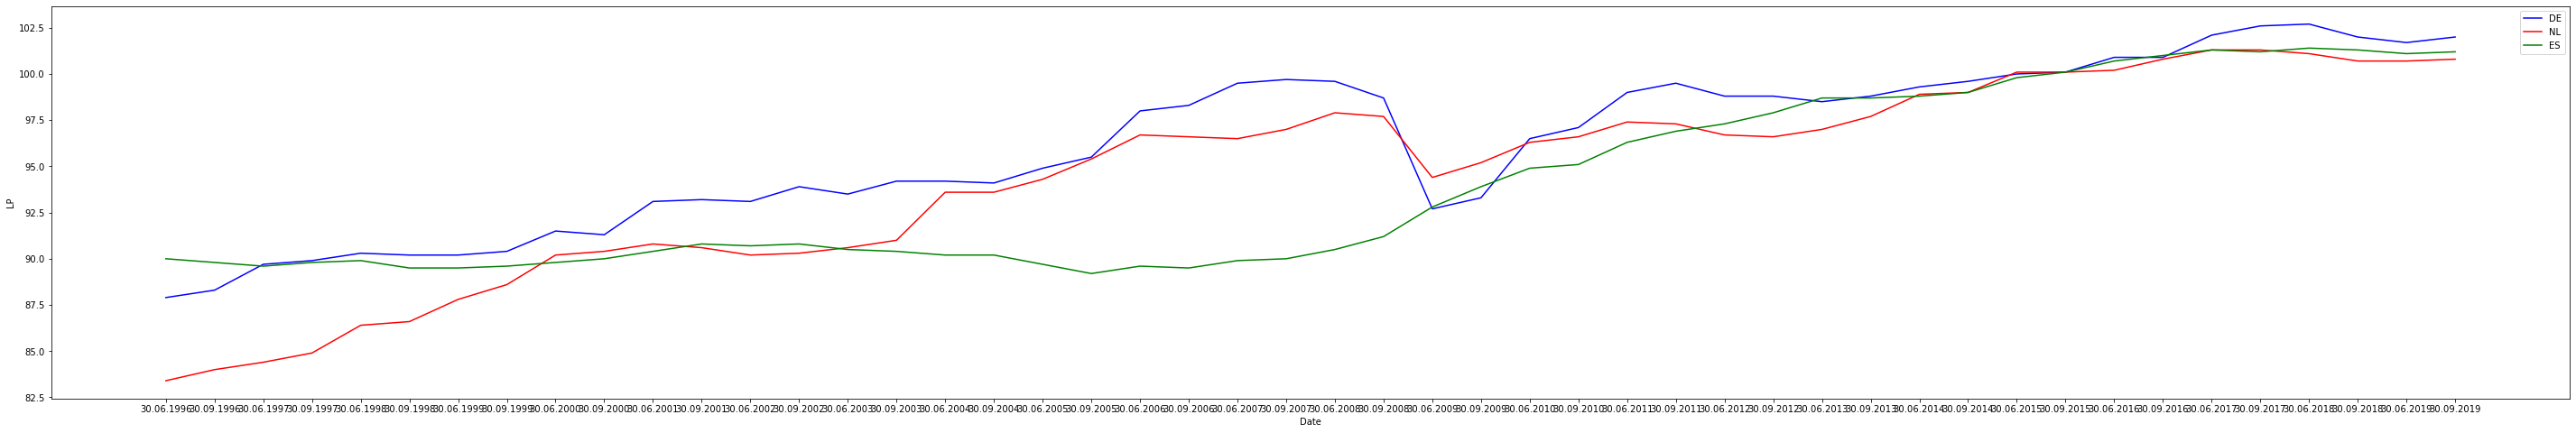

In [5]:
plt.figure(figsize=(50, 8))
plt.plot(df.loc[df['Country'] == 'DE']['Date'], df.loc[df['Country'] == 'DE']['LP'], 
         'b-', label = 'DE')
plt.plot(df.loc[df['Country'] == 'NL']['Date'], df.loc[df['Country'] == 'NL']['LP'], 
         'r-', label = 'NL')
plt.plot(df.loc[df['Country'] == 'ES']['Date'], df.loc[df['Country'] == 'ES']['LP'], 
         'g-', label = 'ES')
plt.xlabel('Date'); 
plt.ylabel('LP'); 
plt.legend();

## Machine learning models

In [6]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

In [7]:
# from sklearn.model_selection import train_test_split
target_column_test = ['LP'] 
predictors_test = ['NumDay', 'Year', 'Quarter',
                  'Country_DE', 'Country_ES', 'Country_NL']
X = df[predictors_test]
y = df[target_column_test]
# X_train, X_test, y_train, y_test = train_test_split(
#     df[predictors_test], df[target_column_test], test_size=0.20, random_state=0)

In [8]:
# generate pairs of train/test sets
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit()
print(tscv)
for train_index, test_index in tscv.split(X):
    print("TRAIN:", train_index, "TEST:", test_index) 
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23] TEST: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47] TEST: [48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71] TEST: [72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71


### Decision trees

In [9]:
# timeseries split cross validation
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
tscv = TimeSeriesSplit()
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model = DecisionTreeRegressor().fit(X_train, y_train)
    pred_test_tree = model.predict(X_test)
    pred_train_tree= model.predict(X_train)
    
print("RMSE(train):",np.sqrt(mean_squared_error(y_train,pred_train_tree)))
print("R2(train):", r2_score(y_train, pred_train_tree))
print("RMSE(test):", np.sqrt(mean_squared_error(y_test,pred_test_tree))) 
print("R2(test):", r2_score(y_test, pred_test_tree))

RMSE(train): 0.0
R2(train): 1.0
RMSE(test): 1.4002975874196644
R2(test): 0.5318577468291467


In [10]:
# 5-fold cross-validation
# from sklearn.model_selection import GridSearchCV

# model = DecisionTreeRegressor()
# gs = GridSearchCV(model,
#                   param_grid = {'max_depth': range(1, 11),
#                                 'min_samples_split': range(10, 60, 10)},
#                   cv=5,
#                   n_jobs=1,
#                   scoring='neg_mean_squared_error')

# gs.fit(X_train, y_train)

# print(gs.best_params_)
# print(-gs.best_score_)

In [11]:
# new_model = DecisionTreeRegressor(max_depth=4,
#                                   min_samples_split=10)
# #or new_model = gs.best_estimator_
# new_model.fit(X_train, y_train)

In [12]:
# the more importance, the more relevant the variable is, according to the model.
pd.DataFrame({'Variable':X_train.columns,
              'Importance':model.feature_importances_}).sort_values('Importance', 
                                                                        ascending=False)

,Variable,Importance
1,Year,0.891037
4,Country_ES,0.069658
5,Country_NL,0.031450
3,Country_DE,0.005474
0,NumDay,0.001359
2,Quarter,0.001022


In [13]:
# pred_train_tree= new_model.predict(X_train)
# print(np.sqrt(mean_squared_error(y_train,pred_train_tree)))
# print(r2_score(y_train, pred_train_tree))

In [14]:
# pred_test_tree= new_model.predict(X_test)
# print(np.sqrt(mean_squared_error(y_test,pred_test_tree))) 
# print(r2_score(y_test, pred_test_tree))

### Random Forest

In [15]:
# timeseries split cross validation
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
tscv = TimeSeriesSplit()
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    rf_model = RandomForestRegressor().fit(X_train, y_train.values.ravel())
    pred_test_tree = rf_model.predict(X_test)
    pred_train_tree= rf_model.predict(X_train)
    
print("RMSE(train):",np.sqrt(mean_squared_error(y_train,pred_train_tree)))
print("R2(train):", r2_score(y_train, pred_train_tree))
print("RMSE(test):", np.sqrt(mean_squared_error(y_test,pred_test_tree))) 
print("R2(test):", r2_score(y_test, pred_test_tree))

RMSE(train): 0.29990886115617366
R2(train): 0.9962056229878642
RMSE(test): 0.804283117647839
R2(test): 0.8455616811738386


In [16]:
# # 5-fold cross-validation
# from sklearn.model_selection import GridSearchCV

# model = RandomForestRegressor()
# gs = GridSearchCV(model,
#                   param_grid = {'max_depth': range(1, 11),
#                                 'min_samples_split': range(10, 60, 10)},
#                   cv=5,
#                   n_jobs=1,
#                   scoring='neg_mean_squared_error')

# gs.fit(X_train, y_train.values.ravel())

# print(gs.best_params_)
# print(-gs.best_score_)

In [17]:
# new_model = RandomForestRegressor(max_depth=5,
#                                   min_samples_split=10)
# #or new_model = gs.best_estimator_
# new_model.fit(X_train, y_train.values.ravel())
# pred_train_tree= new_model.predict(X_train)
# print(np.sqrt(mean_squared_error(y_train,pred_train_tree)))
# print(r2_score(y_train, pred_train_tree))
# pred_test_tree= new_model.predict(X_test)
# print(np.sqrt(mean_squared_error(y_test,pred_test_tree))) 
# print(r2_score(y_test, pred_test_tree))

In [18]:
# the more importance, the more relevant the variable is, according to the model.
pd.DataFrame({'Variable':X_train.columns,
              'Importance':rf_model.feature_importances_}).sort_values('Importance', 
                                                                        ascending=False)

,Variable,Importance
1,Year,0.878767
4,Country_ES,0.054093
5,Country_NL,0.028707
0,NumDay,0.019941
3,Country_DE,0.017378
2,Quarter,0.001115


### Linear Mixed-Effects Models Using lme4

In [19]:
# Normalize time series data
from sklearn import preprocessing
columns = ['LP','NumDay', 'Year', 'Quarter','Country_DE', 'Country_ES', 'Country_NL']

x = df[columns].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_norm = pd.DataFrame(x_scaled)
df_norm.columns = columns
df_norm["Country"] = df["Country"]
print(df_norm)

           LP    NumDay      Year  Quarter  Country_DE  Country_ES  \
0    0.233161  0.228070  0.000000      0.0         1.0         0.0   
1    0.253886  0.140351  0.000000      1.0         1.0         0.0   
2    0.326425  0.000000  0.043478      0.0         1.0         0.0   
3    0.336788  0.333333  0.043478      1.0         1.0         0.0   
4    0.357513  0.140351  0.086957      0.0         1.0         0.0   
..        ...       ...       ...      ...         ...         ...   
139  0.927461  0.280702  0.913043      1.0         0.0         0.0   
140  0.917098  0.385965  0.956522      0.0         0.0         0.0   
141  0.896373  0.719298  0.956522      1.0         0.0         0.0   
142  0.896373  0.245614  1.000000      0.0         0.0         0.0   
143  0.901554  0.649123  1.000000      1.0         0.0         0.0   

     Country_NL Country  
0           0.0      DE  
1           0.0      DE  
2           0.0      DE  
3           0.0      DE  
4           0.0      DE  
.. 

In [20]:
# Install pymer4
# !pip install -q pymer4
# load pymer4
from pymer4.models import Lmer
model = Lmer('LP ~ Year + Quarter + NumDay + (Year + Quarter|Country)', data=df_norm)
display(model.fit())
# ANOVA results from fitted model
display(model.anova())

boundary (singular) fit: see ?isSingular 

Formula: LP~Year+Quarter+NumDay+(Year+Quarter|Country)

Family: gaussian	 Inference: parametric

Number of observations: 144	 Groups: {'Country': 3.0}

Log-likelihood: 131.448 	 AIC: -262.895

Random effects:

                 Name    Var    Std
Country   (Intercept)  0.008  0.087
Country          Year  0.005  0.069
Country       Quarter  0.000  0.003
Residual               0.008  0.088

                 IV1      IV2   Corr
Country  (Intercept)     Year -0.834
Country  (Intercept)  Quarter -0.897
Country         Year  Quarter  0.992

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),0.216,0.113,0.319,0.053,2.015,4.098,0.054,.
Year,0.760,0.668,0.853,0.047,2.058,16.112,0.003,**
Quarter,0.016,-0.018,0.050,0.018,81.896,0.914,0.363,
NumDay,-0.020,-0.085,0.045,0.033,137.303,-0.598,0.551,


SS Type III Analysis of Variance Table with Satterthwaite approximated degrees of freedom:
(NOTE: Using original model contrasts, orthogonality not guaranteed)


,SS,MS,NumDF,DenomDF,F-stat,P-val,Sig
0,1.994837,1.994837,1,2.057824,259.597910,0.003387,**
1,0.006419,0.006419,1,81.896164,0.835365,0.363409,
2,0.002749,0.002749,1,137.303031,0.357700,0.550772,


### regression (gradient descent)

In [21]:
print(df.columns)
print(df.shape)
pd.isna(df).any()

Index(['Date', 'Country', 'NumDay', 'LP', 'GDP', 'Year', 'Quarter',
       'Country_DE', 'Country_ES', 'Country_NL'],
      dtype='object')
(144, 10)


Date          False
Country       False
NumDay        False
LP            False
GDP           False
Year          False
Quarter       False
Country_DE    False
Country_ES    False
Country_NL    False
dtype: bool

In [22]:
x = df[predictors_test].values
print(x.shape)
y = df[target_column_test].values.reshape(-1,1)
print(len(y))
print(y.shape)

(144, 6)
144
(144, 1)


In [23]:
from scipy.stats import pearsonr
print(f'Correlation between Numday and y = {pearsonr(x[:,0],y[:,0])[0]:.2f}')
print(f'Correlation between Year and y = {pearsonr(x[:,1],y[:,0])[0]:.2f}')
print(f'Correlation between Quarter and y = {pearsonr(x[:,2],y[:,0])[0]:.2f}')
# Correlation between year and LP = 0.91

Correlation between Numday and y = 0.19
Correlation between Year and y = 0.91
Correlation between Quarter and y = 0.02


In [24]:
# Add a bias to the input vector
X = np.concatenate((np.ones((len(x),1)),x),axis=1)
X.shape

(144, 7)

In [25]:
# data normalization
Xnorm = X.copy()
minx = np.min(X[:,1:])
maxx = np.max(X[:,1:])
Xnorm[:,1:] = (X[:,1:]-minx)/(maxx-minx)
Xnorm[:10,:]

array([[1.00000000e+00, 6.43883110e-03, 9.88608222e-01, 9.90589401e-04,
        4.95294700e-04, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 3.96235760e-03, 9.88608222e-01, 1.48588410e-03,
        4.95294700e-04, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 9.89103517e-01, 9.90589401e-04,
        4.95294700e-04, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 9.41059931e-03, 9.89103517e-01, 1.48588410e-03,
        4.95294700e-04, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 3.96235760e-03, 9.89598811e-01, 9.90589401e-04,
        4.95294700e-04, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 8.42000991e-03, 9.89598811e-01, 1.48588410e-03,
        4.95294700e-04, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 9.90094106e-01, 9.90589401e-04,
        4.95294700e-04, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.78306092e-02, 9.90094106e-01, 1.48588410e-03,
        4.95294700e-04, 0

In [26]:
ynorm = y.copy()
maxy = np.max(y)
miny = np.min(y)
ynorm = (y-miny)/(maxy - miny) 
ynorm[:10,0]
print(ynorm.shape)

(144, 1)


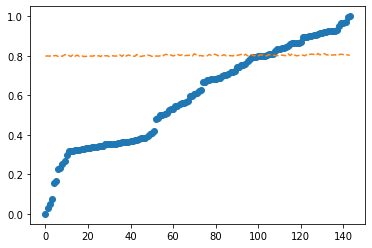

In [27]:
# Initial estimate of parameters
theta0 = np.zeros((X.shape[1],1))+0.4
#theta0 = np.array([[0],[0.5],[2],[0.5]])

ypred = Xnorm.dot(theta0)

sortidx = np.argsort(ynorm[:,0]) # sort the values for better visualization
plt.plot(ynorm[sortidx,0],'o')
plt.plot(ypred[sortidx,0],'--')

In [28]:
# calculate gradient
m=144
def grad(theta):
    dJ = 1/m*np.sum((Xnorm.dot(theta)-ynorm)*Xnorm,axis=0).reshape(-1,1)
    return dJ
grad(theta0)

array([[2.04492907e-01],
       [1.52270031e-03],
       [2.02554561e-01],
       [2.52363656e-04],
       [2.24915133e-05],
       [4.19925144e-05],
       [3.68002253e-05]])

In [29]:
def cost(theta):
    J = np.sum((Xnorm.dot(theta)-ynorm)**2,axis=0)[0]
    return J
cost(theta0)

14.824883386088173

In [30]:
def GD(theta0,learning_rate = 0.5,epochs=1000,TOL=1e-7):
    
    theta_history = [theta0]
    J_history = [cost(theta0)]
    
    thetanew = theta0*10000
    print(f'epoch \t Cost(J) \t')
    for epoch in range(epochs):
        if epoch%100 == 0:
            print(f'{epoch:5d}\t{J_history[-1]:7.4f}\t')
        dJ = grad(theta0)
        J = cost(theta0)
        
        thetanew = theta0 - learning_rate*dJ
        theta_history.append(thetanew)
        J_history.append(J)
        
        if np.sum((thetanew - theta0)**2) < TOL:
            print('Convergence achieved.')
            break
        theta0 = thetanew

    return thetanew,theta_history,J_history

In [31]:
theta,theta_history,J_history = GD(theta0)

epoch 	 Cost(J) 	
    0	14.8249	
  100	 8.8202	
  200	 8.8144	
  300	 8.8085	
  400	 8.8027	
  500	 8.7968	
  600	 8.7910	
  700	 8.7852	
  800	 8.7794	
  900	 8.7736	
Convergence achieved.


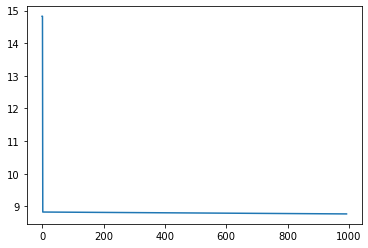

In [32]:
plt.plot(J_history)

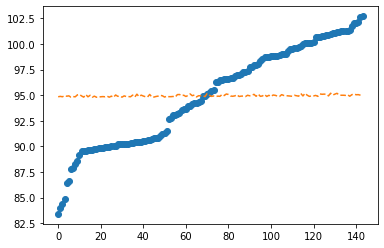

In [33]:
yprednorm = Xnorm.dot(theta)

ypred = yprednorm*(maxy-miny) + miny
plt.plot(y[sortidx,0],'o')
plt.plot(ypred[sortidx,0],'--')